# Exploratory Data Analysis and Data Visualization of the Fake Job Postings Data Set

In [72]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# Adjust some pandas' display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

## Data Exploration

In [133]:
# import data and have a peek at the first 3 rows
df = pd.read_csv('C:/Users/nickm/Desktop/Coding/Projects/fake-job-postings/fake_job_postings.csv')
df.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


In [75]:
# Display DataFrame summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [76]:
# Count number of unique values in each column
df.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11967
benefits                6204
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

In [77]:
# Show share of missing values in columns
df.isna().sum()/len(df)*100

job_id                 0.0000
title                  0.0000
location               1.9351
department            64.5805
salary_range          83.9597
company_profile       18.5011
description            0.0056
requirements          15.0783
benefits              40.3356
telecommuting          0.0000
has_company_logo       0.0000
has_questions          0.0000
employment_type       19.4128
required_experience   39.4295
required_education    45.3300
industry              27.4217
function              36.1018
fraudulent             0.0000
dtype: float64

In [78]:
# Store top 3 unique values in all columns
column = []
characteristic = []
valuecount = []

topx = 3

for c in df.columns:
    n = min(topx, len(df[c].value_counts()))
    column.extend(*[[c]*n])
    characteristic.extend(df[c].value_counts().head(topx).index)
    valuecount.extend(np.round(df[c].value_counts().head(topx).values/len(df)*100, 2))

In [79]:
# Show values
stats = pd.DataFrame({'column': column, 'characteristic': characteristic, 'valuecount_in_percent': valuecount})
stats

,column,characteristic,valuecount_in_percent
0,job_id,1,0.0100
1,job_id,11919,0.0100
2,job_id,11925,0.0100
3,title,English Teacher Abroad,1.7400
4,title,Customer Service Associate,0.8200
5,title,Graduates: English Teacher Abroad (Conversatio...,0.8100
6,location,"GB, LND, London",4.0200
7,location,"US, NY, New York",3.6800
8,location,"US, CA, San Francisco",2.6400
9,department,Sales,3.0800


## Recodes

### Text presence

In [80]:
# define columns which contain descriptive texts of the job posting
cols = ['company_profile', 'description', 'requirements', 'benefits']

for c in cols:
    df[f'has_{c}'] = np.where(df[c].notna(), 1, 0)

In [81]:
# see columns
check_cols = cols + [f'has_{c}' for c in cols]
df[check_cols].head()

,company_profile,description,requirements,benefits,has_company_profile,has_description,has_requirements,has_benefits
0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,1,1,1,0
1,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,1,1,1,1
2,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,1,1,1,0
3,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,1,1,1,1
4,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,1,1,1,1


### Text lengths 

In [82]:
# merge all columns with job texts into one column
df['job_posting'] = df[cols].fillna('').agg(' | '.join, axis=1)

In [83]:
# store character length of each text
cols.append('job_posting')

for c in cols:
    df[f'{c}_length'] = df[c].str.len()

In [84]:
# see columns
df.filter(like='_length').head()

,company_profile_length,description_length,requirements_length,benefits_length,job_posting_length
0,885.0000,905.0000,852.0000,NaN,2651
1,1286.0000,2077.0000,1433.0000,1292.0000,6097
2,879.0000,355.0000,1363.0000,NaN,2606
3,614.0000,2600.0000,1429.0000,782.0000,5434
4,1628.0000,1520.0000,757.0000,21.0000,3935


In [85]:
# show descriptive statistics
df.filter(like='_length').describe()

,company_profile_length,description_length,requirements_length,benefits_length,job_posting_length
count,14572.0000,17879.0000,15184.0000,10668.0000,17880.0000
mean,761.8527,1218.0725,694.9133,350.1176,2646.9338
std,536.3917,894.8073,608.2358,375.4889,1465.7626
min,9.0000,6.0000,1.0000,1.0000,9.0000
25%,392.0000,607.0000,301.0000,91.0000,1559.0000
50%,684.0000,1017.0000,562.0000,237.0000,2499.0000
75%,1022.0000,1586.0000,904.0000,488.0000,3447.0000
max,6178.0000,14907.0000,10864.0000,4429.0000,14916.0000


### Country, State and City

In [86]:
# Break down the location column into country, state and city.
# E.g.: 'GB, LND, London'; 'US, NY, New York'
# -> Split Column by comma
country_state_city = df['location'].str.split(pat=', ', expand=True)
country_state_city.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,US,NY,New York,None,None,None,None,None,None,None,None,None,None,None,None,None
1,NZ,,Auckland,None,None,None,None,None,None,None,None,None,None,None,None,None
2,US,IA,Wever,None,None,None,None,None,None,None,None,None,None,None,None,None
3,US,DC,Washington,None,None,None,None,None,None,None,None,None,None,None,None,None
4,US,FL,Fort Worth,None,None,None,None,None,None,None,None,None,None,None,None,None


In [127]:
# For some postings, the format either differs, or there are multiple locations stated
country_state_city.sort_values(by=4).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
4480,US,CA,San Jose,SFO,Austin,OH,None,None,None,None,None,None,None,None,None,None
17571,US,FL,"Orlando,Lake City","Jacksonville,Atlanta,Ocala,Miami,Asbury Park NJ",Belmar NJ,Toms River NJ.,None,None,None,None,None,None,None,None,None,None
4650,US,FL,Central Fl,Nort Fl,Georgia,Alabama,"Tennessee,South Carolina,North Carolina",None,None,None,None,None,None,None,None,None
1725,US,TX,Austin,San Antonio,Houston,None,None,None,None,None,None,None,None,None,None,None
4396,US,MI,Hartford,Paw Paw,Lawton,None,None,None,None,None,None,None,None,None,None,None


In [89]:
# How many postings have more than one location (or differ in format)
len(df) - country_state_city.isna().sum()

0     17534
1     17440
2     17440
3       118
4        13
5         7
6         2
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
dtype: int64

In [125]:
# of those 118 postings that have more than 3 postings (see column 3), what information is stored in these extra columns?
country_state_city[[0,1,2,3]].loc[country_state_city[3].notna()].head(10)

,0,1,2,3
16,IL,,Tel Aviv,Israel
69,US,CA,Menlo Park,CA
98,US,,Stocton,CA
215,US,CA,Bakersfield,CA / Mt. Poso
219,SA,01,Riyadh,Olaya
314,EG,C,Cairo,Nasr City
343,GR,I,Neo Iraklio,Athens
440,GB,UKM,Stockholm,Sweden
695,GB,,Angel,London
980,US,CO,Boulder,CO


In [91]:
# The information in those extra columns seems to be mostly repetitve (e.g. the state again)
# Therefore, these columns will be ignored and only the first 3 columns will be used to determine
# the country, state and city of a job posting

df['location_country'] = np.where(country_state_city[0] != '', country_state_city[0], np.nan)
df['location_state'] = np.where(country_state_city[1] != '', country_state_city[1], np.nan)
df['location_city'] = np.where(country_state_city[2] != '', country_state_city[2], np.nan)

In [92]:
# show created location columns
df.filter(like='location').head()

,location,location_country,location_state,location_city
0,"US, NY, New York",US,NY,New York
1,"NZ, , Auckland",NZ,NaN,Auckland
2,"US, IA, Wever",US,IA,Wever
3,"US, DC, Washington",US,DC,Washington
4,"US, FL, Fort Worth",US,FL,Fort Worth


In [93]:
# show value counts of unique countries present
df['location_country'].value_counts().head()

location_country
US    10656
GB     2384
GR      940
CA      457
DE      383
Name: count, dtype: int64

In [94]:
# show value counts of unique states
df['location_state'].value_counts().head()

location_state
CA     2051
NY     1259
LND     992
TX      975
I       688
Name: count, dtype: int64

In [95]:
# show value counts of unique cities
df['location_city'].value_counts().head()

location_city
London           1060
New York          669
Athens            543
San Francisco     478
Houston           271
Name: count, dtype: int64

### Salary Range

#### Quality Check and Cleaning

In [96]:
# Only 2868 of the 17880 job postings (~16%) have provided a salary range
print('salary_range not missing\nn:', df['salary_range'].notna().sum())
print('%:', round(df['salary_range'].notna().sum()/len(df), 2))

salary_range not missing
n: 2868
%: 0.16


In [97]:
# Show frequency of stated salary ranges
df.loc[df['salary_range'].notna(), 'salary_range'].value_counts().head(10)

salary_range
0-0             142
40000-50000      66
30000-40000      55
25000-30000      37
45000-67000      37
30000-50000      32
35000-45000      30
80000-100000     30
70000-90000      30
50000-80000      29
Name: count, dtype: int64

In [98]:
# There are some containing the value '0-0', which should be recorded to missing
df['salary_range'] = np.where(df['salary_range'] == '0-0', np.nan, df['salary_range'])

In [99]:
# Show sorted values
df.loc[df['salary_range'].notna(), 'salary_range'].sort_values()

3442          0-1
343        0-1000
16125      0-1000
1599       0-1000
10997    0-100000
           ...   
17656      Dec-25
10316      Jun-18
2313       Oct-15
9911       Oct-20
14196      Oct-20
Name: salary_range, Length: 2726, dtype: object

In [100]:
# There are values which are possibly incorrectly recoded and therefore show a date.
# E.g.: 'Dec-25', 'Oct-20', could be '12-25' or '10-20'
# Since we can't be sure, we'll exclude all values that contain any letter
df['salary_range'] = np.where(df['salary_range'].str.contains(r'[a-zA-Z]'), np.nan, df['salary_range'])

In [101]:
# Show sorted values again
df.loc[df['salary_range'].notna(), 'salary_range'].sort_values()

3442                0-1
343              0-1000
16125            0-1000
1599             0-1000
10997          0-100000
              ...      
2384     960000-1200000
2820     960000-1200000
13677           962-962
8964        99000-99999
9659        99000-99999
Name: salary_range, Length: 2700, dtype: object

In [102]:
# show first values of column
df.loc[df['salary_range'].notna(), 'salary_range'].head(10)

6       20000-28000
10    100000-120000
15    120000-150000
23    100000-120000
31      50000-65000
42      40000-50000
65            60-80
76      65000-70000
77           75-115
79     75000-110000
Name: salary_range, dtype: object

In [103]:
# Most of these values seem to depict the yearly range of salaries. However, some are
# either hourly ranges, or yearly ranges but in k [currency]
# E.g.: '60-80' or '75-115' 

#### Create new columns: 'salary_range_from' and 'salary_range_to'

##### Create Columns

In [104]:
# Let's split this column into 'from' and 'to'
df[['salary_range_from', 'salary_range_to']] = df['salary_range'].str.split(pat='-', expand=True).apply(pd.to_numeric)

In [105]:
# Show original and new columns
df.loc[df['salary_range'].notna()].filter(like='salary').head(10)

,salary_range,salary_range_from,salary_range_to
6,20000-28000,20000.0000,28000.0000
10,100000-120000,100000.0000,120000.0000
15,120000-150000,120000.0000,150000.0000
23,100000-120000,100000.0000,120000.0000
31,50000-65000,50000.0000,65000.0000
42,40000-50000,40000.0000,50000.0000
65,60-80,60.0000,80.0000
76,65000-70000,65000.0000,70000.0000
77,75-115,75.0000,115.0000
79,75000-110000,75000.0000,110000.0000


##### Quality Check and Cleaning

In [106]:
# Show distribution
df.filter(like='salary_range_').describe()

,salary_range_from,salary_range_to
count,2700.0000,2699.0000
mean,542516.7526,855322.5936
std,18152191.5368,27759604.2791
min,0.0000,1.0000
25%,20000.0000,30000.0000
50%,40000.0000,52000.0000
75%,60000.0000,90000.0000
max,800000000.0000,1200000000.0000


In [107]:
# The max value seems extremely high. Let's have a closer look at this case in our DataFrame.
df.loc[df['salary_range']=='800000000-1200000000']

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,has_company_profile,has_description,has_requirements,has_benefits,job_posting,company_profile_length,description_length,requirements_length,benefits_length,job_posting_length,location_country,location_state,location_city,salary_range_from,salary_range_to
3139,3140,National Sales Manager,"ID, JW, Jakarta",Danone - Sari Husada,800000000-1200000000,Local expertise with an international perspect...,Sari Husada is a member of a leading food and ...,The candidates will required to have a univers...,.../...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Consumer Goods,Sales,0,1,1,1,1,Local expertise with an international perspect...,1067.0000,733.0000,608.0000,7.0000,2424,ID,JW,Jakarta,800000000.0000,1200000000.0000


In [108]:
# This case might state the salary range in Indonesian Rupiah. 
# Show top 3 values.
df.sort_values(by='salary_range_from', ascending=False).head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,has_company_profile,has_description,has_requirements,has_benefits,job_posting,company_profile_length,description_length,requirements_length,benefits_length,job_posting_length,location_country,location_state,location_city,salary_range_from,salary_range_to
3139,3140,National Sales Manager,"ID, JW, Jakarta",Danone - Sari Husada,800000000-1200000000,Local expertise with an international perspect...,Sari Husada is a member of a leading food and ...,The candidates will required to have a univers...,.../...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Consumer Goods,Sales,0,1,1,1,1,Local expertise with an international perspect...,1067.0000,733.0000,608.0000,7.0000,2424,ID,JW,Jakarta,800000000.0000,1200000000.0000
12251,12252,Sales Manager - General Trade,"ID, JW, Jakarta",Arc Int.,500000000-800000000,Local expertise with an international perspect...,Client - ARC InternationalArc International is...,Driven and result orientedStrong in leadership...,TBA,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Consumer Goods,Sales,0,1,1,1,1,Local expertise with an international perspect...,1067.0000,1342.0000,230.0000,3.0000,2651,ID,JW,Jakarta,500000000.0000,800000000.0000
5073,5074,Junior Engineer/Engineering Technician,"US, CA, San Jose","Engineering, Pipeline Design",6266624-8582080,NaN,"Founded in 1866, San Jose Water Company is an...",Required Knowledge and Skills:Useful and profi...,San Jose Water Company offers a very comprehen...,0,0,1,Full-time,Entry level,Associate Degree,Utilities,Engineering,1,0,1,1,1,"| Founded in 1866, San Jose Water Company is...",NaN,1307.0000,1058.0000,168.0000,2542,US,CA,San Jose,6266624.0000,8582080.0000


In [109]:
# The 2 highest (by far) are both from Indonesia.
# Inspect all salary_ranges from Indonesia
df.loc[(df['location_country']=='ID') & (df['salary_range'].notna())]

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,has_company_profile,has_description,has_requirements,has_benefits,job_posting,company_profile_length,description_length,requirements_length,benefits_length,job_posting_length,location_country,location_state,location_city,salary_range_from,salary_range_to
3139,3140,National Sales Manager,"ID, JW, Jakarta",Danone - Sari Husada,800000000-1200000000,Local expertise with an international perspect...,Sari Husada is a member of a leading food and ...,The candidates will required to have a univers...,.../...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Consumer Goods,Sales,0,1,1,1,1,Local expertise with an international perspect...,1067.0000,733.0000,608.0000,7.0000,2424,ID,JW,Jakarta,800000000.0000,1200000000.0000
5907,5908,Become a co-Director in Indonesia,"ID, , Medan",NaN,750-750,NaN,If you’re looking for a long-term volunteering...,Those who are secure without the comforts of h...,Stipend: Volunteers must commit to serve at le...,0,0,0,Full-time,Not Applicable,Unspecified,Education Management,Education,0,0,1,1,1,| If you’re looking for a long-term volunteer...,NaN,2299.0000,607.0000,657.0000,3572,ID,NaN,Medan,750.0000,750.0000
9341,9342,Executive Search Consultant,"ID, JW, Jakarta",Wisma Metropolitan I,25000-35000,Local expertise with an international perspect...,"Passionate about your Clients’ business, you a...","Driven and Motivated, you are an out-going and...",Facing demanding Clients and extraordinary cha...,0,1,1,Full-time,Associate,Bachelor's Degree,Staffing and Recruiting,Consulting,0,1,1,1,1,Local expertise with an international perspect...,1067.0000,720.0000,599.0000,569.0000,2964,ID,JW,Jakarta,25000.0000,35000.0000
12251,12252,Sales Manager - General Trade,"ID, JW, Jakarta",Arc Int.,500000000-800000000,Local expertise with an international perspect...,Client - ARC InternationalArc International is...,Driven and result orientedStrong in leadership...,TBA,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Consumer Goods,Sales,0,1,1,1,1,Local expertise with an international perspect...,1067.0000,1342.0000,230.0000,3.0000,2651,ID,JW,Jakarta,500000000.0000,800000000.0000


In [110]:
# Let's convert the constructed values into USD for those cases.
# As of today (03/13/2024), the exchange rate is 1 USD = 15,574.35 IDR
idr_to_usd = 15_574.35
df['salary_range_from'] = np.where((df['location_country']=='ID') & (df['salary_range'].notna()),
                                   df['salary_range_from']/idr_to_usd,
                                   df['salary_range_from'])
df['salary_range_to'] = np.where((df['location_country']=='ID') & (df['salary_range'].notna()),
                                 df['salary_range_to']/idr_to_usd,
                                 df['salary_range_to'])

In [111]:
# Check results (values might be in hourly income, or yearly income in 1000 IDR)
df.loc[(df['location_country']=='ID') & (df['salary_range'].notna())].filter(like='salary')

,salary_range,salary_range_from,salary_range_to
3139,800000000-1200000000,51366.5097,77049.7645
5907,750-750,0.0482,0.0482
9341,25000-35000,1.6052,2.2473
12251,500000000-800000000,32104.0685,51366.5097


In [112]:
# Check how many nonmissing values there are
df.filter(like='salary').notna().sum()

salary_range         2700
salary_range_from    2700
salary_range_to      2699
dtype: int64

In [113]:
# In one case we only have a value for the lower part of the range
df.loc[(df['salary_range_from'].notna()) & (df['salary_range_to'].isna())]

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,has_company_profile,has_description,has_requirements,has_benefits,job_posting,company_profile_length,description_length,requirements_length,benefits_length,job_posting_length,location_country,location_state,location_city,salary_range_from,salary_range_to
5538,5539,Inside Sales Magazine Advertising,"US, CA, Yorba Linda",NaN,40000,NaN,"​IMPORTANT: TO BE CONSIDERED, PLEASE SEND YOUR...",Desired Skills and ExperienceThe following att...,This full time position includes a COMPETITIVE...,0,1,1,Full-time,Associate,Bachelor's Degree,Publishing,Accounting/Auditing,0,0,1,1,1,"| ​IMPORTANT: TO BE CONSIDERED, PLEASE SEND Y...",NaN,340.0000,2011.0000,256.0000,2616,US,CA,Yorba Linda,40000.0000,NaN


In [114]:
# Store ID for recode and check
check_id = df.loc[(df['salary_range_from'].notna()) & (df['salary_range_to'].isna())].index
check_id

Index([5538], dtype='int64')

In [118]:
# This job offer stated the anticipated final pay instead of a range.
# We'll just use this value to fill the 'to' column
# df['salary_range_to'] = np.where((df['salary_range_from'].notna()) & (df['salary_range_to'].isna()),
#                                  df['salary_range_from'],
#                                  df['salary_range_to'])
df.loc[check_id, 'salary_range_to'] = df.loc[check_id, 'salary_range_from']
df.filter(like='salary').iloc[check_id]

,salary_range,salary_range_from,salary_range_to
5538,40000,40000.0000,40000.0000


#### Create new columns: 'salary_range_mid' and 'salary_range_peak_to_peak'

In [45]:
# Create a column containing the midpoint of the stated salary range.
df['salary_range_mid'] = np.mean(df[['salary_range_from', 'salary_range_to']], axis=1)

In [46]:
# Create a column containing the range (max-min) of the salary range.
df['salary_range_peak_to_peak'] = np.ptp(df[['salary_range_from', 'salary_range_to']], axis=1)

In [119]:
# Show columns
df.filter(like='salary').loc[df['salary_range'].notna()].head()

,salary_range,salary_range_from,salary_range_to
6,20000-28000,20000.0000,28000.0000
10,100000-120000,100000.0000,120000.0000
15,120000-150000,120000.0000,150000.0000
23,100000-120000,100000.0000,120000.0000
31,50000-65000,50000.0000,65000.0000


#### Create new column: 'has_salary_range'

In [48]:
# Create binary variable depicting whether a salary range is stated in the job listing.
df['has_salary_range'] = np.where(df['salary_range'].notna(), 1, 0)
df['has_salary_range'].value_counts()

has_salary_range
0    15180
1     2700
Name: count, dtype: int64

## Explore differences between real and fake job postings

### Fraudulent Jobs Distribution

In [49]:
# real-fake-job distribution
fraud_dist = df['fraudulent'].value_counts()
fraud_dist

fraudulent
0    17014
1      866
Name: count, dtype: int64

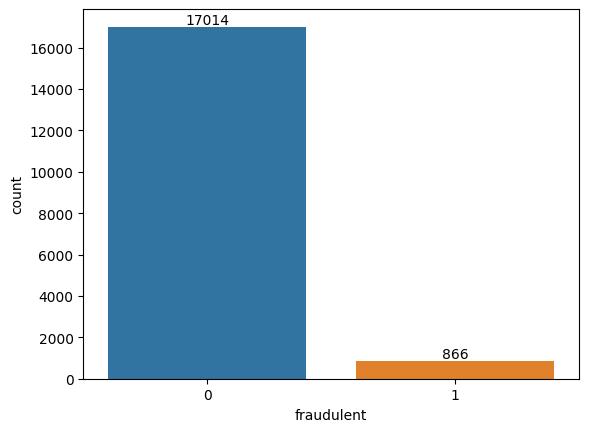

In [50]:
# Plot
ax = plt.subplot()
sns.countplot(x=df['fraudulent'], ax=ax)
ax.bar_label(container=ax.containers[0], labels=fraud_dist);

### Numeric Variables

#### Overview

In [51]:
# Define names of numeric columns
num_cols = df.dtypes[df.dtypes != 'object'].index
num_cols = num_cols.drop('job_id')
print(num_cols, len(num_cols))

Index(['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent',
       'has_company_profile', 'has_description', 'has_requirements',
       'has_benefits', 'company_profile_length', 'description_length',
       'requirements_length', 'benefits_length', 'job_posting_length',
       'salary_range_from', 'salary_range_to', 'salary_range_mid',
       'salary_range_peak_to_peak', 'has_salary_range'],
      dtype='object') 18


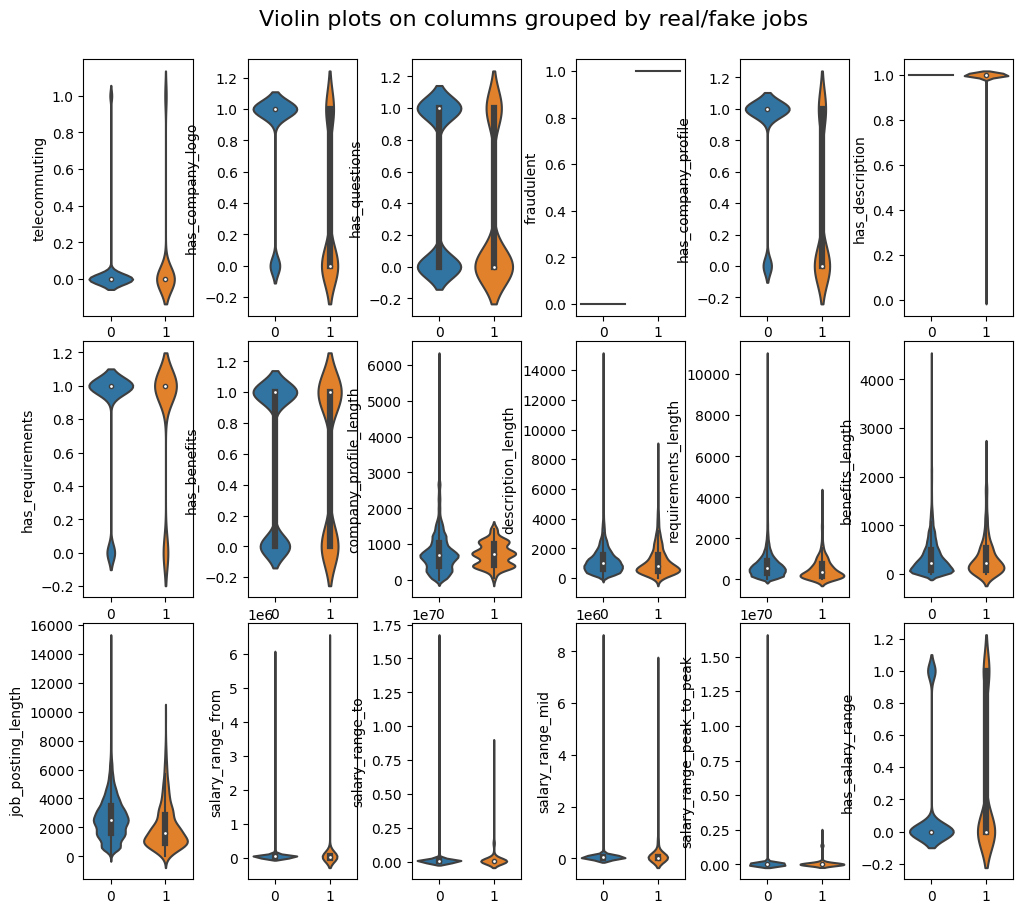

In [52]:
# Create violin plots for all numeric variables, grouped by 'fraudulent' column
fig, axs = plt.subplots(figsize=(12, 10), ncols=6, nrows=3)
plt.subplots_adjust(wspace=0.5, hspace=0.1)
plt.suptitle('Violin plots on columns grouped by real/fake jobs', size=16)
plt.subplots_adjust(top=0.93)
axs = axs.ravel()

for ax_nr, col in enumerate(num_cols):
    sns.violinplot(data=df, x='fraudulent', y=col, ax=axs[ax_nr]).set(xlabel='')

#### Text Presence

In [53]:
# Share of presence of text parts
text_presence_cols = ['has_company_profile', 'has_description', 'has_requirements', 'has_benefits']

df.groupby(by='fraudulent')[text_presence_cols].mean()

,has_company_profile,has_description,has_requirements,has_benefits
fraudulent,,,,
0,0.8401,1.0000,0.8506,0.5975
1,0.3222,0.9988,0.8222,0.5797


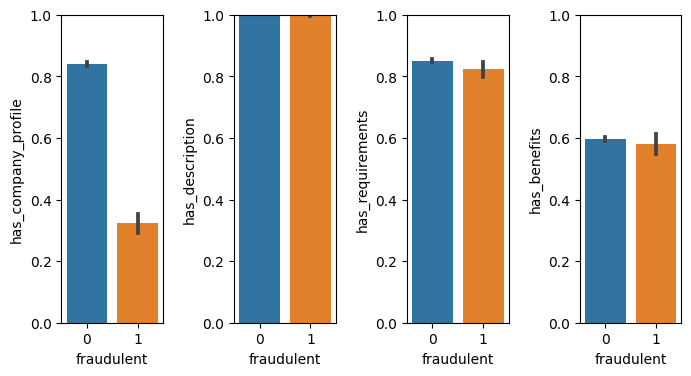

In [54]:
# Plots
fig, axs = plt.subplots(figsize=(8, 4), ncols=len(text_presence_cols))
plt.subplots_adjust(wspace=0.7)

for ax_nr, col in enumerate(text_presence_cols):
    sns.barplot(y=df[col], x=df['fraudulent'], ax=axs[ax_nr]).set(ylim=(0,1))

#### Text Length

In [55]:
# Comparison of average lengths of postings - Mean
text_len_cols = df.filter(like='length').columns

df.groupby(by='fraudulent')[text_len_cols].mean()

,company_profile_length,description_length,requirements_length,benefits_length,job_posting_length
fraudulent,,,,,
0,762.7346,1221.2197,702.4105,349.3304,2677.1660
1,716.6738,1156.1699,542.5267,366.0598,2052.9723


In [56]:
# Comparison of average lengths of postings - Median
df.groupby(by='fraudulent')[text_len_cols].median()

,company_profile_length,description_length,requirements_length,benefits_length,job_posting_length
fraudulent,,,,,
0,684.0000,1027.0000,569.0000,237.0000,2539.0000
1,718.0000,846.0000,349.5000,233.5000,1633.5000


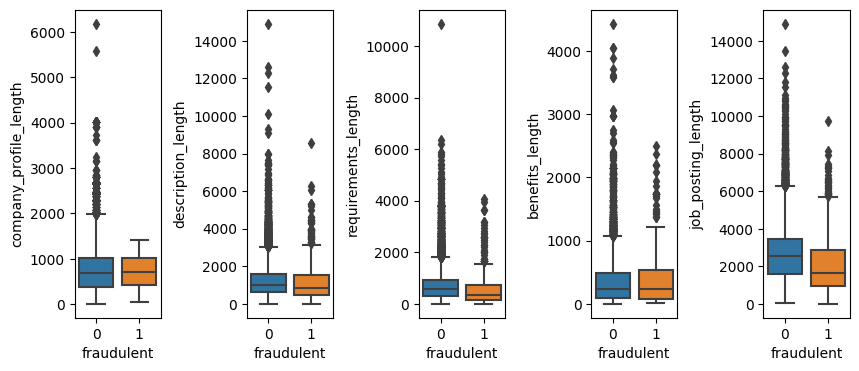

In [57]:
# Plots
fig, axs = plt.subplots(figsize=(10, 4), ncols=len(text_len_cols))
plt.subplots_adjust(wspace=1)

for ax_nr, col in enumerate(text_len_cols):
    sns.boxplot(data=df, x='fraudulent', y=col, ax=axs[ax_nr])

#### Salary

In [58]:
# Share of postings with stated salary
df.groupby(by='fraudulent')['has_salary_range'].mean()

fraudulent
0   0.1459
1   0.2517
Name: has_salary_range, dtype: float64

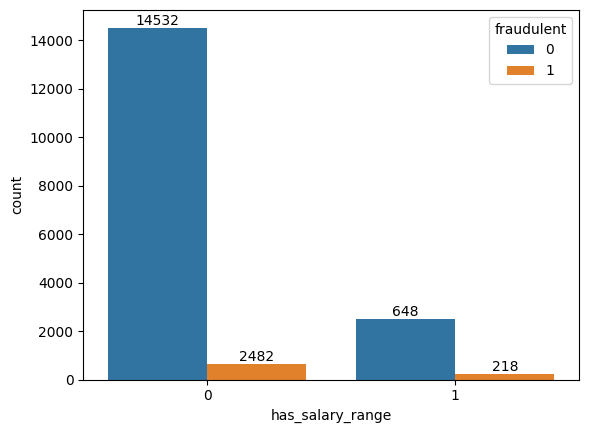

In [59]:
# Plot
ax = plt.subplot()
sns.countplot(x=df['has_salary_range'], hue=df['fraudulent'], ax=ax)

lab = df.groupby(by=['has_salary_range', 'fraudulent'])['job_id'].count().values
ax.bar_label(container=ax.containers[0], labels=lab[[0,1]])
ax.bar_label(container=ax.containers[1], labels=lab[[2,3]]);

In [60]:
# Comparison of salary - Mean
salary_cols = df.filter(like='salary_range_').columns

df.groupby(by='fraudulent')[salary_cols].mean()

,salary_range_from,salary_range_to,salary_range_mid,salary_range_peak_to_peak
fraudulent,,,,
0,60479.3260,110049.3959,85264.3610,49570.0698
1,67629.6651,162870.4037,115250.0344,95240.7385


In [61]:
# Comparison of salary - Median
df.groupby(by='fraudulent')[salary_cols].median()

,salary_range_from,salary_range_to,salary_range_mid,salary_range_peak_to_peak
fraudulent,,,,
0,40000.0000,55000.0000,47500.0000,12000.0000
1,30000.0000,45000.0000,37500.0000,10000.0000


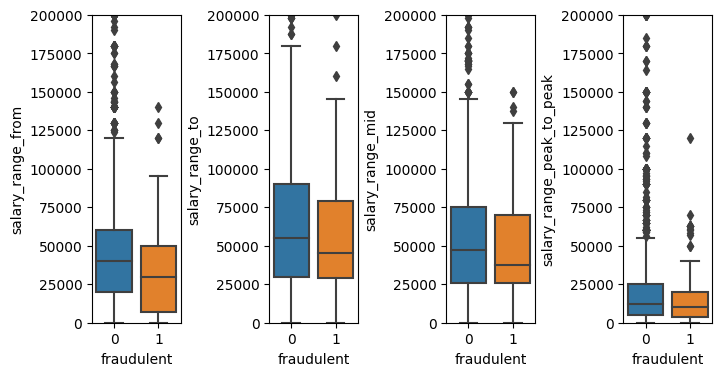

In [62]:
# Plots
fig, axs = plt.subplots(figsize=(8, 4), ncols=len(salary_cols))
plt.subplots_adjust(wspace=1)

for ax_nr, col in enumerate(salary_cols):
    sns.boxplot(data=df, x='fraudulent', y=col, ax=axs[ax_nr])
    axs[ax_nr].set(ylim=(0, 2e5))

#### Other

In [63]:
# Share of jobs with telecommuting, company logo and questions
other_cols = ['telecommuting', 'has_company_logo', 'has_questions']

df.groupby(by='fraudulent')[other_cols].mean()

,telecommuting,has_company_logo,has_questions
fraudulent,,,
0,0.0413,0.8191,0.5021
1,0.0739,0.3268,0.2887


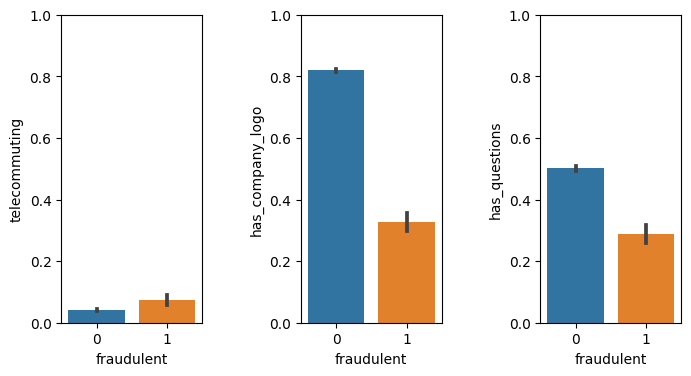

In [64]:
# Plots
fig, axs = plt.subplots(figsize=(8, 4), ncols=len(other_cols))
plt.subplots_adjust(wspace=0.7)

for ax_nr, col in enumerate(other_cols):
    sns.barplot(y=df[col], x=df['fraudulent'], ax=axs[ax_nr]).set(ylim=(0,1))

### Categorical Variables

In [65]:
# Top 3 unique values for real vs. fake jobs
object_cols = df.dtypes[df.dtypes == 'object'].index

column = []
characteristic_real, valuecount_n_real, valuecount_p_real = [], [], []
characteristic_fake, valuecount_n_fake, valuecount_p_fake = [], [], []

n_real = len(df.loc[df['fraudulent']==0])
n_fake = len(df.loc[df['fraudulent']==1])

topx = 3

for c in object_cols:
    n = min(topx, len(df[c].value_counts()))
    column.extend(*[[c]*n])

    characteristic_real.extend(df.loc[df['fraudulent']==0, c].value_counts().head(topx).index)
    valuecount_n_real.extend(df.loc[df['fraudulent']==0, c].value_counts().head(topx).values)
    valuecount_p_real.extend(np.round(df.loc[df['fraudulent']==0, c].value_counts().head(topx).values/n_real*100, 2))

    characteristic_fake.extend(df.loc[df['fraudulent']==1, c].value_counts().head(topx).index)
    valuecount_n_fake.extend(df.loc[df['fraudulent']==1, c].value_counts().head(topx).values)
    valuecount_p_fake.extend(np.round(df.loc[df['fraudulent']==1, c].value_counts().head(topx).values/n_fake*100, 2))

In [66]:
# Print stats
stats = pd.DataFrame({'column': column,
                      'characteristic_real': pd.Series(characteristic_real).str.slice(stop=30),
                      'valuecount_real_n_(%)': [f'{n} ({p}%)' for n, p in zip(valuecount_n_real, valuecount_p_real)],
                      'characteristic_fake': pd.Series(characteristic_fake).str.slice(stop=30),
                      'valuecount_fake_n_(%)': [f'{n} ({p}%)' for n, p in zip(valuecount_n_fake, valuecount_p_fake)],
                      })
stats

,column,characteristic_real,valuecount_real_n_(%),characteristic_fake,valuecount_fake_n_(%)
0,title,English Teacher Abroad,311 (1.83%),Data Entry Admin/Clerical Posi,21 (2.42%)
1,title,Customer Service Associate,146 (0.86%),Home Based Payroll Typist/Data,21 (2.42%)
2,title,Graduates: English Teacher Abr,144 (0.85%),Cruise Staff Wanted *URGENT*,21 (2.42%)
3,location,"GB, LND, London",716 (4.21%),"US, TX, Houston",92 (10.62%)
4,location,"US, NY, New York",638 (3.75%),"AU, NSW, Sydney",31 (3.58%)
5,location,"GR, I, Athens",464 (2.73%),"US, ,",28 (3.23%)
6,department,Sales,539 (3.17%),Engineering,46 (5.31%)
7,department,Engineering,441 (2.59%),Clerical,27 (3.12%)
8,department,Marketing,399 (2.35%),Oil & Energy,24 (2.77%)
9,salary_range,40000-50000,65 (0.38%),7200-1380000,10 (1.15%)
